# Using stochastic gradient descent to solve $Ax=b$

In [1]:
import numpy as np

In [2]:
N=100
k=3
A=np.random.rand(N,k)
b=np.random.rand(N,1)
print('A:',A)
print('b:',b)

A: [[9.50654216e-01 1.40202573e-01 5.20222373e-01]
 [6.10813633e-01 6.07530302e-01 2.20353641e-01]
 [9.50560935e-01 4.56646628e-01 9.22051605e-01]
 [4.77681053e-01 3.89804841e-01 5.84604848e-01]
 [7.31366977e-02 9.19855056e-01 3.18714753e-01]
 [8.49977024e-01 9.15786031e-01 7.33137514e-01]
 [1.95108580e-01 3.59658143e-01 8.05367715e-01]
 [5.73262894e-01 1.78949588e-01 6.25295323e-01]
 [2.04107875e-01 1.85857785e-01 5.37367837e-01]
 [7.29159537e-01 7.01031806e-01 9.39381999e-01]
 [5.14679883e-01 7.53099958e-01 7.67705608e-01]
 [7.61913943e-01 6.30506215e-01 9.19226465e-01]
 [3.24775308e-01 8.85504100e-02 2.22540760e-01]
 [5.97441090e-01 1.60198718e-02 9.60956294e-01]
 [9.19421183e-01 4.67831189e-01 7.10099987e-01]
 [8.80185923e-01 2.38465997e-01 3.12971634e-01]
 [4.02691761e-01 9.06765397e-01 9.42947562e-01]
 [8.00925815e-01 9.60227198e-02 1.94154698e-01]
 [9.26551889e-01 4.55328106e-01 4.08700630e-01]
 [4.58307916e-01 1.21093920e-01 6.96403929e-02]
 [1.26279106e-01 4.18476036e-01 6.886

In [17]:
def compGrad(A,x,b):
    return 2*(A@x-b).T@A

def stocCompGrad(A,x,b):
    randInd=np.random.choice(N,size=int(.2*N))
    return compGrad(A[randInd,:],x,b[randInd,:])

def compObj(A,x,b):
    return np.linalg.norm(A@x-b)

In [18]:
x=np.random.rand(k,1)
stepsize=.01
objective=[]
objective.append(compObj(A,x,b))

In [19]:
x=x-stepsize*stocCompGrad(A,x,b).T
objective.append(compObj(A,x,b))

In [20]:
for i in range(50):
    x=x-stepsize*stocCompGrad(A,x,b).T
    objective.append(compObj(A,x,b))

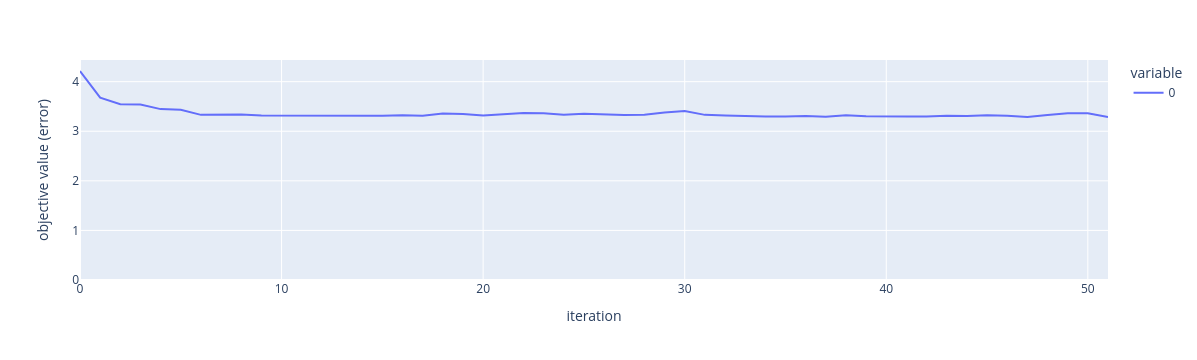

In [21]:
import plotly.express as px
fig=px.line(objective)
fig.update_layout(
    xaxis_title='iteration',
    yaxis_title='objective value (error)'
)
fig.update_yaxes(rangemode="tozero")
fig.show()